In [ ]:
!pip install tensorflow

^C


Defaulting to user installation because normal site-packages is not writeable
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:39
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:39
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:39
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:39
   ---------------------------------------- 0.5/390.3 MB 1.4 MB/s eta 0:04:39
   ---------------------------------------- 0.8/390.3 MB 453.5 kB/s eta 0:14:19
   ---------------------------------------- 1.0/390.3 MB 541.2 kB/s eta 0:12:00
   ----

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\patel\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\tensorflow\\include\\external\\com_github_grpc_grpc\\src\\core\\ext\\filters\\client_channel\\lb_policy\\grpclb\\client_load_reporting_filter.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths



In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'tensorflow'

#### *XOR Dataset*

In [1682]:
# Generate XOR dataset
np.random.seed(0)
X = np.random.rand(400, 2) * 200 - 100  # Generate 400 points in the range [-1, 1]
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)  # XOR labels
# Shuffle the data
indices = np.arange(len(X))
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

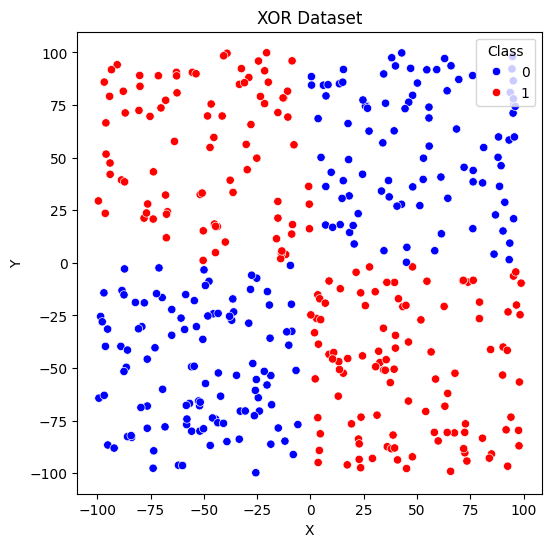

In [1683]:
# Create DataFrame for XOR dataset
import pandas as pd
df = pd.DataFrame({'Feature 1': X_shuffled[:, 0], 'Feature 2': X_shuffled[:, 1], 'Class': y_shuffled})

# Plot XOR dataset using seaborn
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Class', palette=['blue', 'red'])
plt.title('XOR Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(title='Class', loc='upper right')
plt.show()


### *Multi-layer Perceptron (MLP) Model*

In [1684]:
class MLP(nn.Module):
    def __init__(self, input_size, output_size, hidden_size1, hidden_size2):
        super(MLP, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size2, output_size)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu1(x)
        x = self.linear2(x)
        x = self.relu2(x)
        x = self.output_layer(x)
        return x

### *Training MLP model without any regularization*

In [1685]:
def train(model, X, y, num_epochs=10000,learning_rate=0.01):
    opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
    prev_loss = float('inf') 
    i = 0
    for e in range(num_epochs):
        opt.zero_grad()
        logits = model(torch.tensor(X, dtype=torch.float32))
        loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(y, dtype=torch.float32).view(-1, 1))
        loss.backward()
        opt.step()
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss.item()}')
        if np.abs(prev_loss - loss.item()) < 1e-5:
            break
        prev_loss = loss.item() 
        i += 1

### *Training MLP model with L1 regularization*

In [1686]:
def train_L1(model, X, y, num_epochs=10000, learning_rate=0.01, l1_lambda=0.001):
    opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
    prev_loss = float('inf') 
    i = 0
    for e in range(num_epochs):
        opt.zero_grad()
        logits = model(torch.tensor(X, dtype=torch.float32))
        loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(y, dtype=torch.float32).view(-1, 1))
        
        # L1 regularization
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1)
        
        loss += l1_lambda * l1_regularization
        
        loss.backward()
        opt.step()
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss.item()}')
        if np.abs(prev_loss - loss.item()) < 1e-5:
            break
        prev_loss = loss.item() 
        i += 1


### *Training MLP model with L2 regularization*

In [1687]:
def train_L2(model, X, y, num_epochs=10000, learning_rate=0.01, l2_lambda=0.001):
    opt = torch.optim.Adam(model.parameters(), lr=learning_rate)
    prev_loss = float('inf') 
    i = 0
    for e in range(num_epochs):
        opt.zero_grad()
        logits = model(torch.tensor(X, dtype=torch.float32))
        loss = nn.BCEWithLogitsLoss()(logits, torch.tensor(y, dtype=torch.float32).view(-1, 1))
        
        # L2 regularization
        l2_regularization = torch.tensor(0.)
        for param in model.parameters():
            l2_regularization += torch.norm(param, 2)
        
        loss += l2_lambda * l2_regularization
        
        loss.backward()
        opt.step()
        if i % 100 == 0:
            print(f'Epoch {i}, Loss: {loss.item()}')
        if np.abs(prev_loss - loss.item()) < 1e-5:
            break
        prev_loss = loss.item() 
        i += 1

### *Function to visualize the decision boundary of the trained model*

In [1688]:
def predict_plot_grid(model, X_train, y_train,title=''):
    XX, YY = np.meshgrid(np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
    X_grid = np.column_stack((XX.ravel(), YY.ravel()))
    X_tensor = torch.tensor(X_grid, dtype=torch.float32)
    logits = model(X_tensor)
    probs = torch.sigmoid(logits).detach().numpy().reshape(100, 100)  # Apply sigmoid to obtain probabilities
    preds = (probs > 0.5).astype(int)  # Threshold probabilities at 0.5
    
    plt.contourf(XX, YY, preds, levels=[0.0, 0.5, 1.0], cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)


##### *Train MLP model without any regularization*

In [1689]:
mlp_model = MLP(input_size=2, output_size=1, hidden_size1=5, hidden_size2=4)

for param_name, param in mlp_model.named_parameters():
    print(param_name, param.shape)

linear1.weight torch.Size([5, 2])
linear1.bias torch.Size([5])
linear2.weight torch.Size([4, 5])
linear2.bias torch.Size([4])
output_layer.weight torch.Size([1, 4])
output_layer.bias torch.Size([1])


In [1690]:
y_pred_untrained = mlp_model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
y_pred_untrained = torch.sigmoid(torch.tensor(y_pred_untrained)).detach().numpy()
y_pred_untrained = (y_pred_untrained > 0.5).astype(int)

print(f'Untrained model accuracy: {accuracy_score(y_test, y_pred_untrained)}')

Untrained model accuracy: 0.51


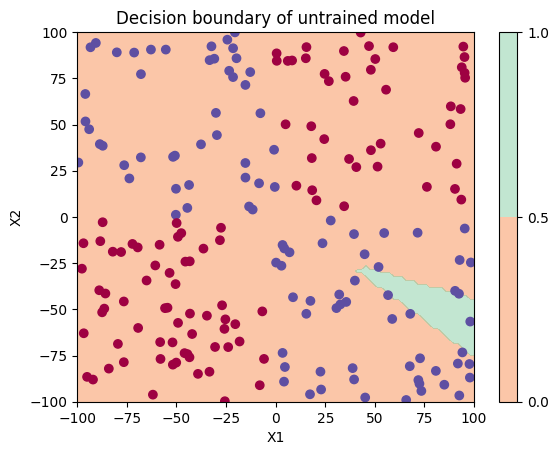

In [1691]:
predict_plot_grid(mlp_model, X_train, y_train, title='Decision boundary of untrained model')

In [1692]:
train(mlp_model, X_train, y_train, learning_rate=0.01)

Epoch 0, Loss: 1.4943974018096924
Epoch 100, Loss: 0.03580516576766968
Epoch 200, Loss: 0.01682507060468197
Epoch 300, Loss: 0.009521294385194778
Epoch 400, Loss: 0.005659378599375486
Epoch 500, Loss: 0.0035504759289324284


In [1693]:
y_pred_trained = mlp_model(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()
y_pred_trained = torch.sigmoid(torch.tensor(y_pred_trained)).detach().numpy()
y_pred_trained = (y_pred_trained > 0.5).astype(int)

print(f'Accuracy on train model: {accuracy_score(y_train, y_pred_trained):.2f}')

Accuracy on train model: 1.00


In [1694]:
y_pred = mlp_model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
y_pred = torch.sigmoid(torch.tensor(y_pred,dtype=torch.float32)).detach().view(-1).numpy()
y_pred = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy on test model: {accuracy:.2f}')

Accuracy on test model: 0.99


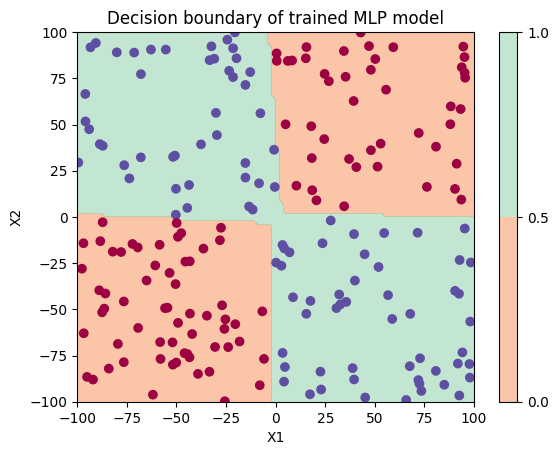

In [1695]:
predict_plot_grid(mlp_model, X_train, y_train,title='Decision boundary of trained MLP model')

##### *Train MLP model with L1 regularization*

In [1696]:
mlp_model_l1 = MLP(input_size=2, output_size=1, hidden_size1=3, hidden_size2=5)
train_L1(mlp_model_l1, X_train, y_train, learning_rate=0.01, l1_lambda=0.002)

Epoch 0, Loss: 3.749713897705078
Epoch 100, Loss: 0.24461214244365692
Epoch 200, Loss: 0.08507481217384338
Epoch 300, Loss: 0.055420517921447754


In [1697]:
y_pred_train = mlp_model_l1(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()
y_pred_train = torch.sigmoid(torch.tensor(y_pred_train)).detach().numpy()
y_pred_train = (y_pred_train > 0.5).astype(int)

accuracy_train = accuracy_score(y_train, y_pred_train)
print('Training set:-')
print(f'Accuracy with L1 regularization: {accuracy_train:.2f}')

Training set:-
Accuracy with L1 regularization: 1.00


In [1698]:
y_pred = mlp_model_l1(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
y_pred = torch.sigmoid(torch.tensor(y_pred,dtype=torch.float32)).detach().view(-1).numpy()
y_pred = (y_pred > 0.5).astype(int)
accuracy_mlp_l1 = accuracy_score(y_test, y_pred)
print('Test set:-')
print(f'Accuracy with L1 regularization: {accuracy_mlp_l1:.2f}')

Test set:-
Accuracy with L1 regularization: 0.99


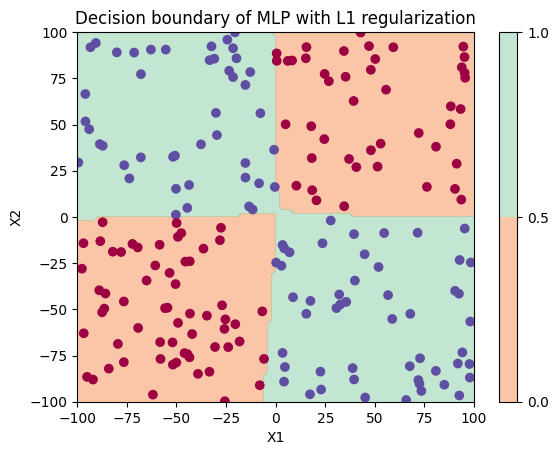

In [1699]:
predict_plot_grid(mlp_model_l1, X_train, y_train, title='Decision boundary of MLP with L1 regularization')

##### *Train MLP model with L2 regularization*

In [1700]:
mlp_model_l2 = MLP(input_size=2, output_size=1, hidden_size1=3, hidden_size2=5)
train_L2(mlp_model_l2, X_train, y_train, learning_rate=0.01, l2_lambda=0.002)

Epoch 0, Loss: 3.9717888832092285
Epoch 100, Loss: 0.17812521755695343
Epoch 200, Loss: 0.07143369317054749
Epoch 300, Loss: 0.04669918864965439
Epoch 400, Loss: 0.030124133452773094
Epoch 500, Loss: 0.024865783751010895
Epoch 600, Loss: 0.022884543985128403


In [1701]:
y_pred_training = mlp_model_l2(torch.tensor(X_train, dtype=torch.float32)).detach().numpy()
y_pred_training = torch.sigmoid(torch.tensor(y_pred_training,dtype=torch.float32)).detach().view(-1).numpy()
y_pred_training = (y_pred_training > 0.5).astype(int)
accuracy_mlp_l2 = accuracy_score(y_train, y_pred_training)
print("Training set:-")
print(f'Accuracy with L2 regularization: {accuracy_mlp_l2:.2f}')

Training set:-
Accuracy with L2 regularization: 1.00


In [1702]:
y_pred = mlp_model_l2(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
y_pred = torch.sigmoid(torch.tensor(y_pred,dtype=torch.float32)).detach().view(-1).numpy()
y_pred = (y_pred > 0.5).astype(int)
accuracy_mlp_l2 = accuracy_score(y_test, y_pred)
print("Test set:-")
print(f'Accuracy with L2 regularization: {accuracy_mlp_l2:.2f}')

Test set:-
Accuracy with L2 regularization: 0.99


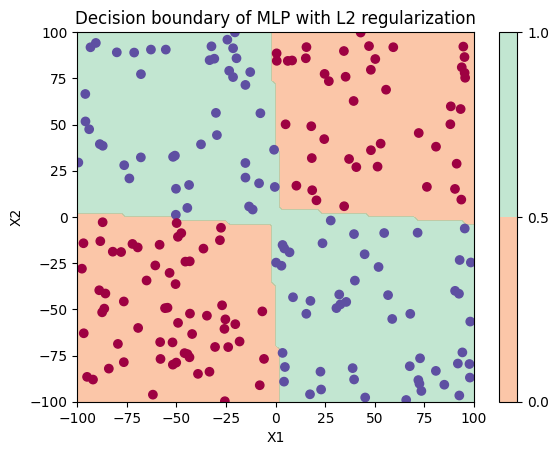

In [1703]:
predict_plot_grid(mlp_model_l2, X_train, y_train, title='Decision boundary of MLP with L2 regularization')

### *Logistic Regression Model*

In [1704]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)
    
    def forward(self, x):
        logits = self.linear(x)
        return logits

##### *Training Logistic Regression model without any additional features*

In [1705]:
logistic_model = LogisticRegression(input_size=2)

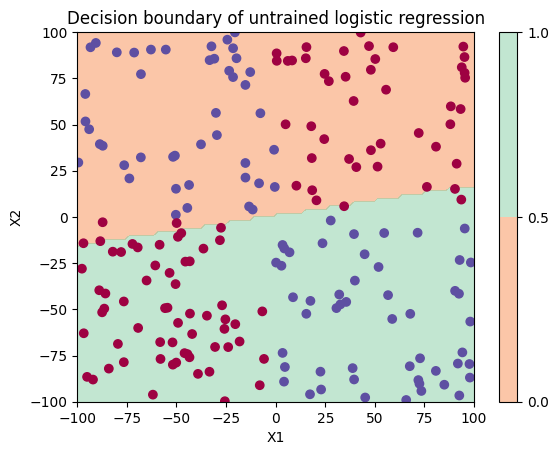

In [1706]:
predict_plot_grid(logistic_model, X_train, y_train,title='Decision boundary of untrained logistic regression')

In [1707]:
train(logistic_model, X_train, y_train, learning_rate=0.01)

Epoch 0, Loss: 8.324671745300293
Epoch 100, Loss: 0.6819567680358887


In [1708]:
y_pred = logistic_model(torch.tensor(X_test, dtype=torch.float32)).detach().numpy()
y_pred = torch.sigmoid(torch.tensor(y_pred,dtype=torch.float32)).detach().view(-1).numpy()
y_pred = (y_pred > 0.5).astype(int)
accuracy_logistic = accuracy_score(y_test, y_pred)
print(f'Accuracy without using extra features: {accuracy_logistic:.2f}')

Accuracy without using extra features: 0.56


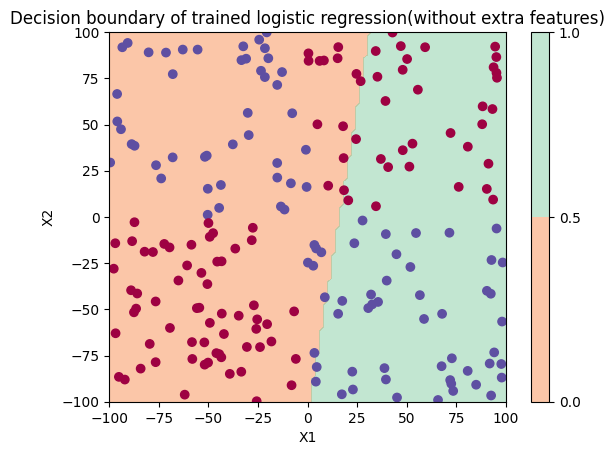

In [1709]:
predict_plot_grid(logistic_model, X_train, y_train,title='Decision boundary of trained logistic regression(without extra features)')

##### *Training Logistic Regression model with additional features*

In [1710]:
# Compute additional features X1^2, X2^2, X1, and X2
X_train_additional = np.column_stack((X_train[:, 0] ** 2, X_train[:, 1] ** 2, X_train[:, 0]*X_train[:, 1]))
X_test_additional = np.column_stack((X_test[:, 0] ** 2, X_test[:, 1] ** 2, X_test[:, 0]*X_test[:, 1]))

# Concatenate additional features with original data
X_train_extended = np.concatenate((X_train, X_train_additional), axis=1)
X_test_extended = np.concatenate((X_test, X_test_additional), axis=1)
print("Shape of X_train_extended:", X_train_extended.shape)
print("Shape of X_test_extended:", X_test_extended.shape)

Shape of X_train_extended: (200, 5)
Shape of X_test_extended: (200, 5)


In [1711]:
logistic_model_extended = LogisticRegression(input_size=5)

In [1712]:
train(logistic_model_extended, X_train_extended, y_train, learning_rate=0.01)

Epoch 0, Loss: 887.0183715820312
Epoch 100, Loss: 0.08266390115022659
Epoch 200, Loss: 0.020587634295225143
Epoch 300, Loss: 0.011601916514337063
Epoch 400, Loss: 0.006363855674862862
Epoch 500, Loss: 0.003336676163598895


In [1713]:
y_pred = logistic_model_extended(torch.tensor(X_test_extended, dtype=torch.float32)).detach().numpy()
y_pred = torch.sigmoid(torch.tensor(y_pred,dtype=torch.float32)).detach().view(-1).numpy()
y_pred = (y_pred > 0.5).astype(int)
accuracy_logistic_extended = accuracy_score(y_test, y_pred)
print(f'Accuracy using extra features: {accuracy_logistic_extended:.2f}')

Accuracy using extra features: 0.98


In [1714]:
def predict_plot_grid(model, X_train, y_train,title=""):
    XX, YY = np.meshgrid(np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
    X_grid = np.column_stack((XX.ravel(), YY.ravel(), XX.ravel() ** 2, YY.ravel() ** 2, XX.ravel() * YY.ravel()))
    X_tensor = torch.tensor(X_grid, dtype=torch.float32)
    logits = model(X_tensor)
    probs = torch.sigmoid(logits).detach().numpy().reshape(100, 100)  # Apply sigmoid to obtain probabilities
    preds = (probs > 0.5).astype(int)  # Threshold probabilities at 0.5
    
    plt.contourf(XX, YY, preds, levels=[0.0, 0.5, 1.0], cmap=plt.cm.Spectral, alpha=0.5)
    plt.colorbar()
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Spectral)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)




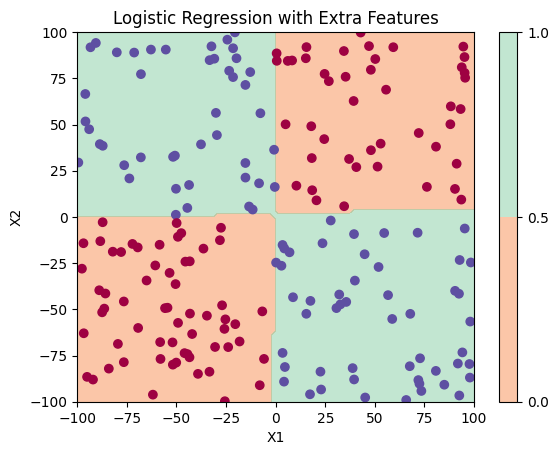

In [1715]:
predict_plot_grid(logistic_model_extended, X_train_extended, y_train,title="Logistic Regression with Extra Features")